In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Queue():
    def __init__(self, initial):
        self.items = [initial]
    def isEmpty(self):
        return self.items == []
    def enqueue(self, item):
        self.items.insert(0,item)
    def dequeue(self):
        return self.items.pop()
    def size(self):
        return len(self.items)


In [3]:
class Stack():
    def __init__(self, initial):
        self.items = [initial]
    def isEmpty(self):
        return self.items == []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def size(self):
        return len(self.items)

In [4]:
class State():
    right = {0, 1, 3, 4, 6, 7}
    left = {1, 2, 4, 5, 7, 8}
    up = {3, 4, 5, 6, 7, 8}
    down = {0, 1, 2, 3, 4, 5}

    def __init__(self, board_config, parent, move):
        self.board_config = board_config  # board configuration of the current state in a string
        self.board_config_list = list(map(int,board_config.split(',')))  # board configuration of the current state in a list
        #print(self.board_config_list)
        self.i = self.board_config_list.index(0)  # index of empty space in board (index of 0 in this case)
        self.parent = parent  # parent state (node) of the present state
        self.move = move  # the move (Up,Down,Left,Right) made in parent state that results in the present state
    def get_children(self):
        """returns the list of all possible states reachable from the current state,
        each child in the list is a State object"""
        children = []
        if self.i in State.up:
            new_board_config = self.board_config_list[:]
            new_board_config[self.i], new_board_config[self.i-3] = new_board_config[self.i-3], new_board_config[self.i]
            children.append(State(','.join(map(str,new_board_config)), self.board_config,'Up'))

        if self.i in State.down:
            new_board_config = self.board_config_list[:]
            new_board_config[self.i], new_board_config[self.i+3] = new_board_config[self.i+3], new_board_config[self.i]
            children.append(State(','.join(map(str,new_board_config)), self.board_config,'Down'))

        if self.i in State.left:
            new_board_config = self.board_config_list[:]
            new_board_config[self.i], new_board_config[self.i-1] = new_board_config[self.i-1], new_board_config[self.i]
            children.append(State(','.join(map(str,new_board_config)), self.board_config,'Left'))

        if self.i in State.right:
            new_board_config = self.board_config_list[:]
            new_board_config[self.i], new_board_config[self.i+1] = new_board_config[self.i+1], new_board_config[self.i]
            children.append(State(','.join(map(str,new_board_config)), self.board_config,'Right'))
        return children
    def plot_8_puzzle(self):
        board = np.array([int(x) for x in self.board_config.split(',')]).reshape(3, 3)

        fig, ax = plt.subplots()
        ax.matshow(board)

        for i in range(3):
            for j in range(3):
                ax.text(j, i, str(board[i, j]), va='center', ha='center', fontsize=20, color='black')

        plt.title('8 Puzzle')
        plt.show()

    def __str__(self):
        return self.board_config


In [11]:
def dfs(initial,goal):
  frontier = Stack(initial)
  frontier_set = set()
  while not frontier.isEmpty():
      state = frontier.pop()
      frontier_set.add(state.board_config)
      if state.board_config == goal:
        return "success"
      else:
        for child in state.get_children():
          if child.board_config not in frontier_set:
            frontier.push(child)
    
  print(count)
  return 'failure'




In [12]:
def bfs(initial,goal):
  frontier = Queue(initial)
  frontier_set = set()
  graph = {}
  while not frontier.isEmpty():
    state = frontier.dequeue()
    frontier_set.add(state.board_config)
    graph[state.board_config]= state
    if state.board_config == goal:
      path = []
      current = state
      while not current.parent == None:
        current.plot_8_puzzle()
        path.append(current.move)
        current = graph[current.parent]
      return path
    else:
      for child in state.get_children():
        if child.board_config not in frontier_set:
          frontier.enqueue(child)

  return 'failure'


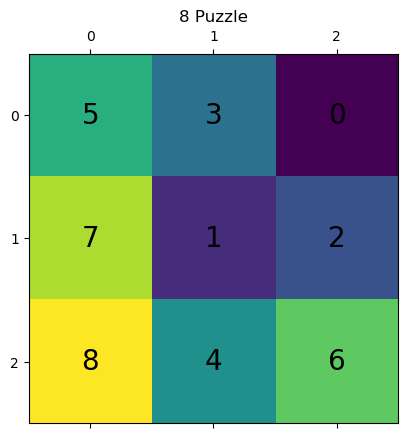

In [13]:
start = '5,3,0,7,1,2,8,4,6'
goal = '0,1,2,3,4,5,6,7,8'
initial_state = State(start, None, None)
initial_state.plot_8_puzzle()


In [17]:
import time
s=time.time()
print(dfs(initial_state, goal))
f=time.time()
e=f-s
print(e)



success
1.6093299388885498


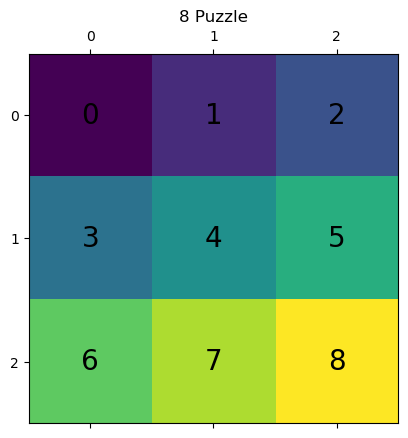

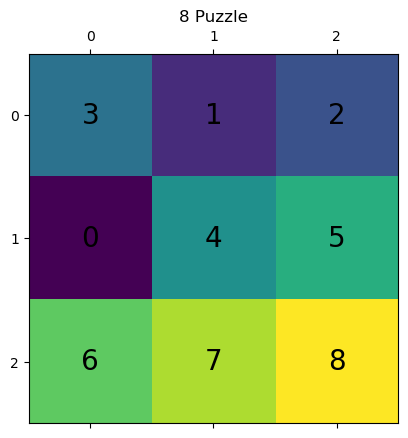

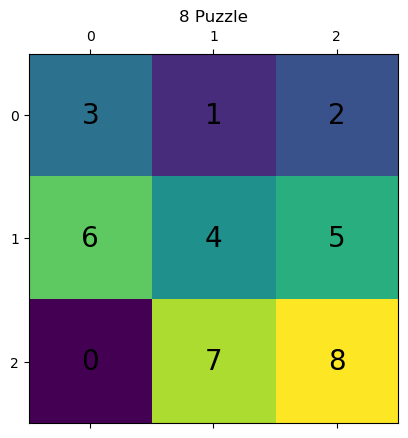

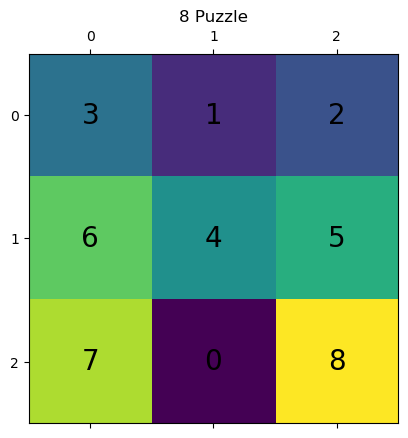

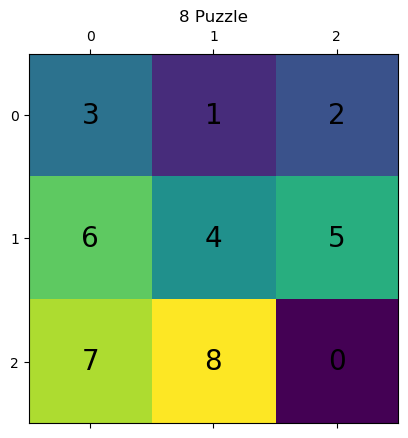

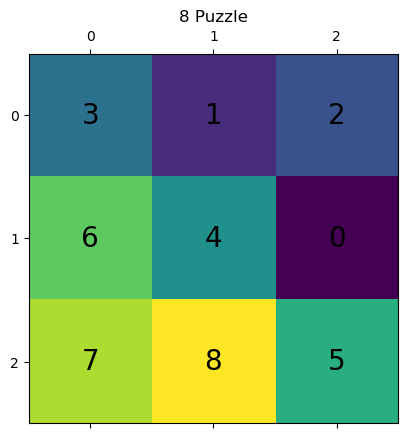

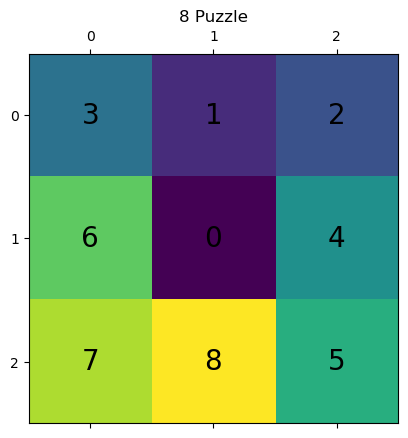

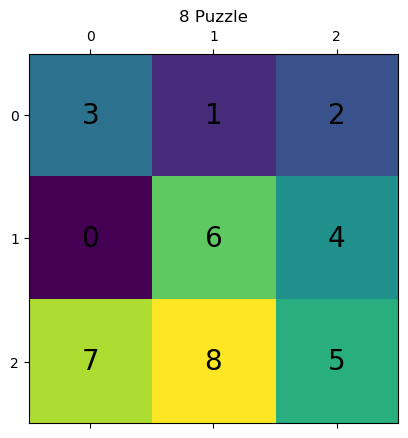

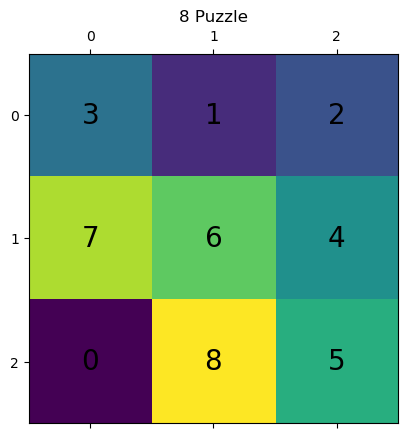

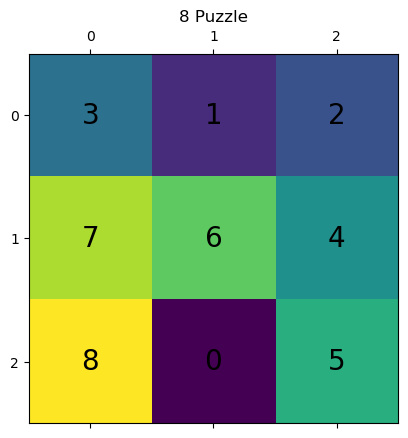

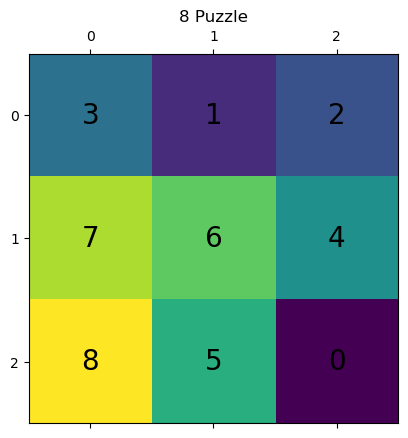

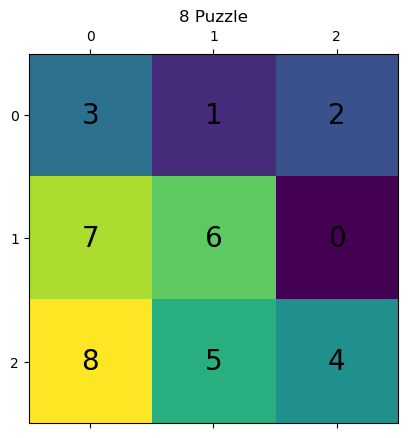

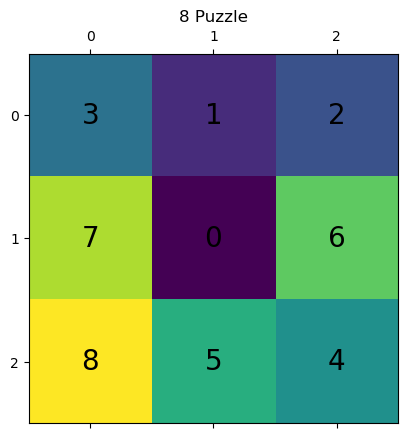

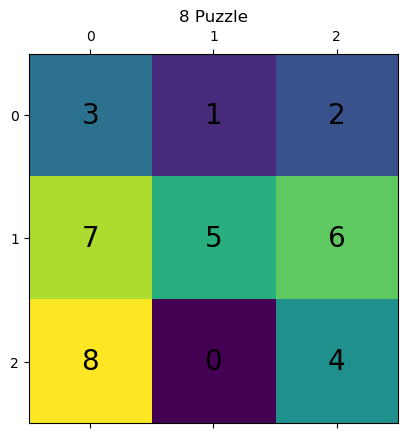

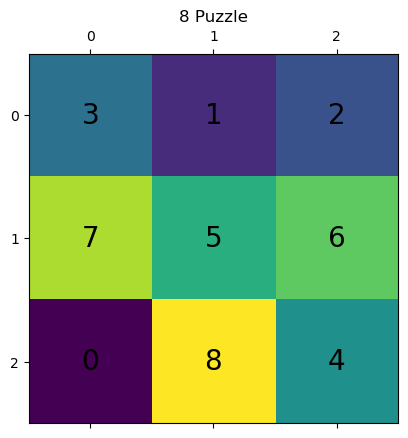

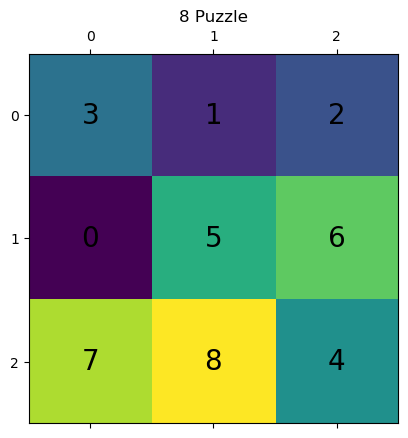

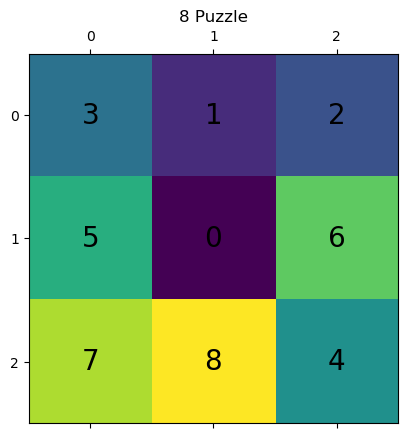

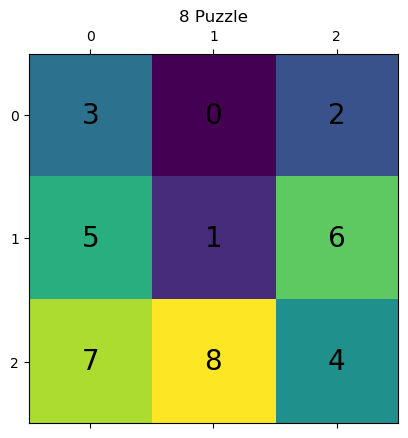

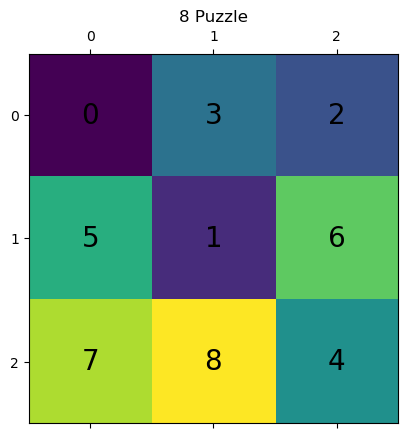

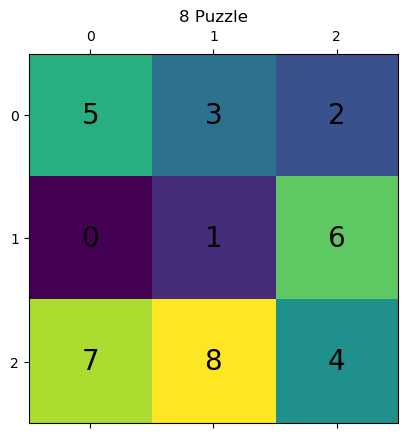

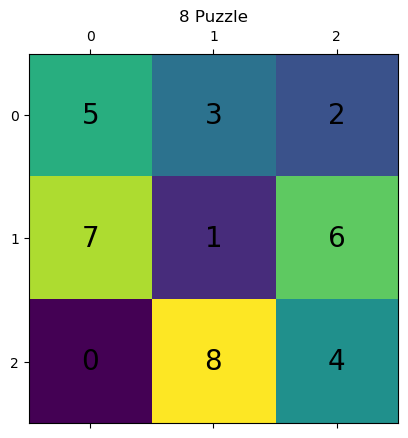

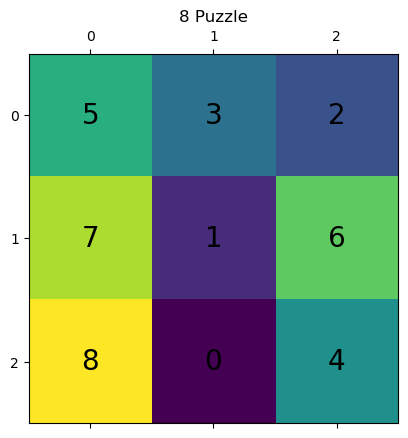

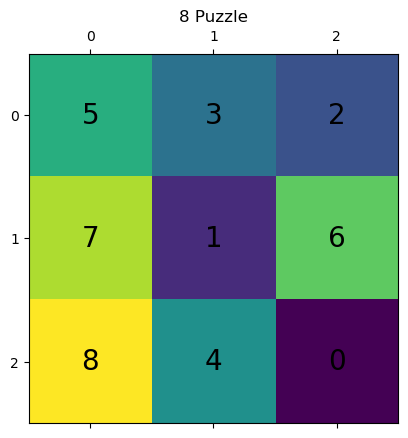

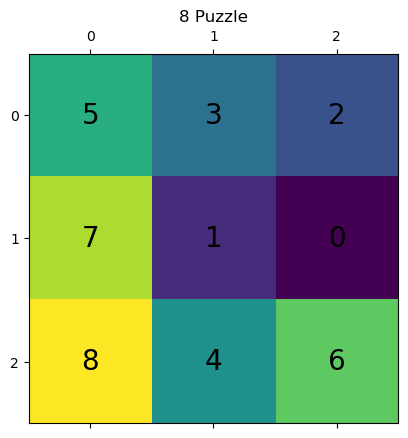

['Up', 'Up', 'Left', 'Left', 'Down', 'Right', 'Right', 'Up', 'Left', 'Left', 'Down', 'Right', 'Up', 'Right', 'Down', 'Left', 'Down', 'Right', 'Up', 'Up', 'Left', 'Left', 'Down', 'Down']
8.656869411468506


In [14]:
import time
s=time.time()
print(bfs(initial_state, goal))
f=time.time()
e=f-s
print(e)
